In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [6]:
# Normalize pixel values
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)


In [7]:
# Load VGG16 without top layer
base_model = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(32, 32, 3)
)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Custom classification head
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
output = Dense(10, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
history = model.fit(
    X_train,
    y_train_cat,
    validation_split=0.2,
    epochs=10,
    batch_size=64
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 513s 819ms/step - accuracy: 0.3027 - loss: 2.0218 - val_accuracy: 0.4887 - val_loss: 1.5269
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 601s 882ms/step - accuracy: 0.5081 - loss: 1.4757 - val_accuracy: 0.5226 - val_loss: 1.3931
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 561s 880ms/step - accuracy: 0.5340 - loss: 1.3715 - val_accuracy: 0.5432 - val_loss: 1.3311
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 562s 880ms/step - accuracy: 0.5509 - loss: 1.3109 - val_accuracy: 0.5577 - val_loss: 1.2916
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 549s 879ms/step - accuracy: 0.5674 - loss: 1.2709 - val_accuracy: 0.5623 - val_loss: 1.2656
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 562s 879ms/step - accuracy: 0.5744 - loss: 1.2403 - val_accuracy: 0.5685 - val_loss: 1.2469
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 549s 879ms/step - accuracy: 0.5833 - loss: 1.2189 - val_accuracy: 0.5688 - val_loss: 1.2329
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 562s 878ms/step - accuracy: 0.5884 -

In [10]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 119s 379ms/step - accuracy: 0.5753 - loss: 1.2176
Test Accuracy: 0.5751000046730042


In [11]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 108s 343ms/step
              precision    recall  f1-score   support

           0       0.66      0.62      0.64      1000
           1       0.63      0.62      0.62      1000
           2       0.51      0.44      0.47      1000
           3       0.44      0.39      0.41      1000
           4       0.55      0.50      0.52      1000
           5       0.49      0.58      0.53      1000
           6       0.62      0.65      0.64      1000
           7       0.66      0.58      0.62      1000
           8       0.62      0.75      0.68      1000
           9       0.58      0.62      0.60      1000

    accuracy                           0.58     10000
   macro avg       0.57      0.58      0.57     10000
weighted avg       0.57      0.58      0.57     10000



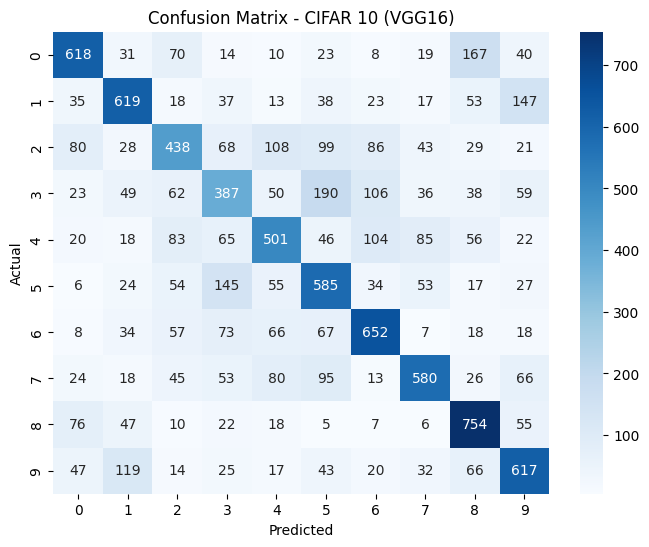

In [12]:
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CIFAR 10 (VGG16)")
plt.show()
